# Time Series EDA

## Steps to be Followed during the Entire Process 


### 1. Data Ingestion
### 2. EDA of the Data
### 3. Processing of the Data 
### 4. Model Building 
### 5. Model Evaluation

### Data Ingestion

Import the Required Libraries 
Load the Data 
Load the Time Series Data into the Pandas Dataframe 
Set the date-time column as the index of the Dataframe.
Check the data type of the index and convert it into the date-time if necessary 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [5]:
data=pd.read_csv("TSLA.CSV")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [8]:
# Univariate Anlaysis
stock_data=data[['Date','Close']]

In [12]:
stock_data.info() #The date is in object so convert it into date and time 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [14]:
# Converting it into the Date and Time 
stock_data['Date']=pd.to_datetime(stock_data.Date) #Converted to Date and Time 

/tmp/ipykernel_70/4149800649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data.Date) #Converted to Date and Time


In [15]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [16]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [18]:
# Setting the column as Index
stock_data=stock_data.set_index('Date')

#### Why we are converting date column as a index column

1. Can easily retrive the data
2. Visulization is also simple
3. Those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [19]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


### EDA of the DATA 

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [21]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


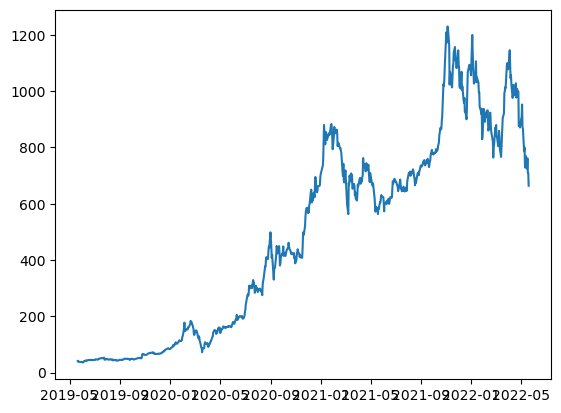

In [23]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

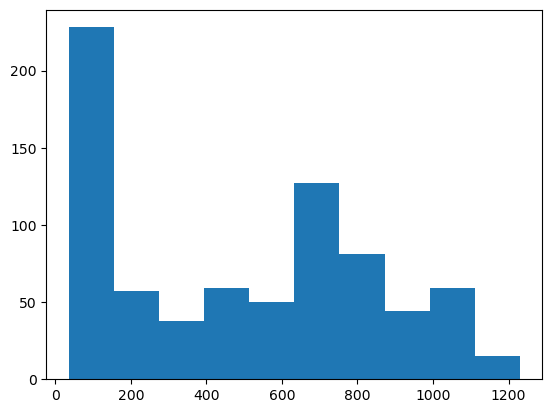

In [24]:
plt.hist(stock_data.Close)

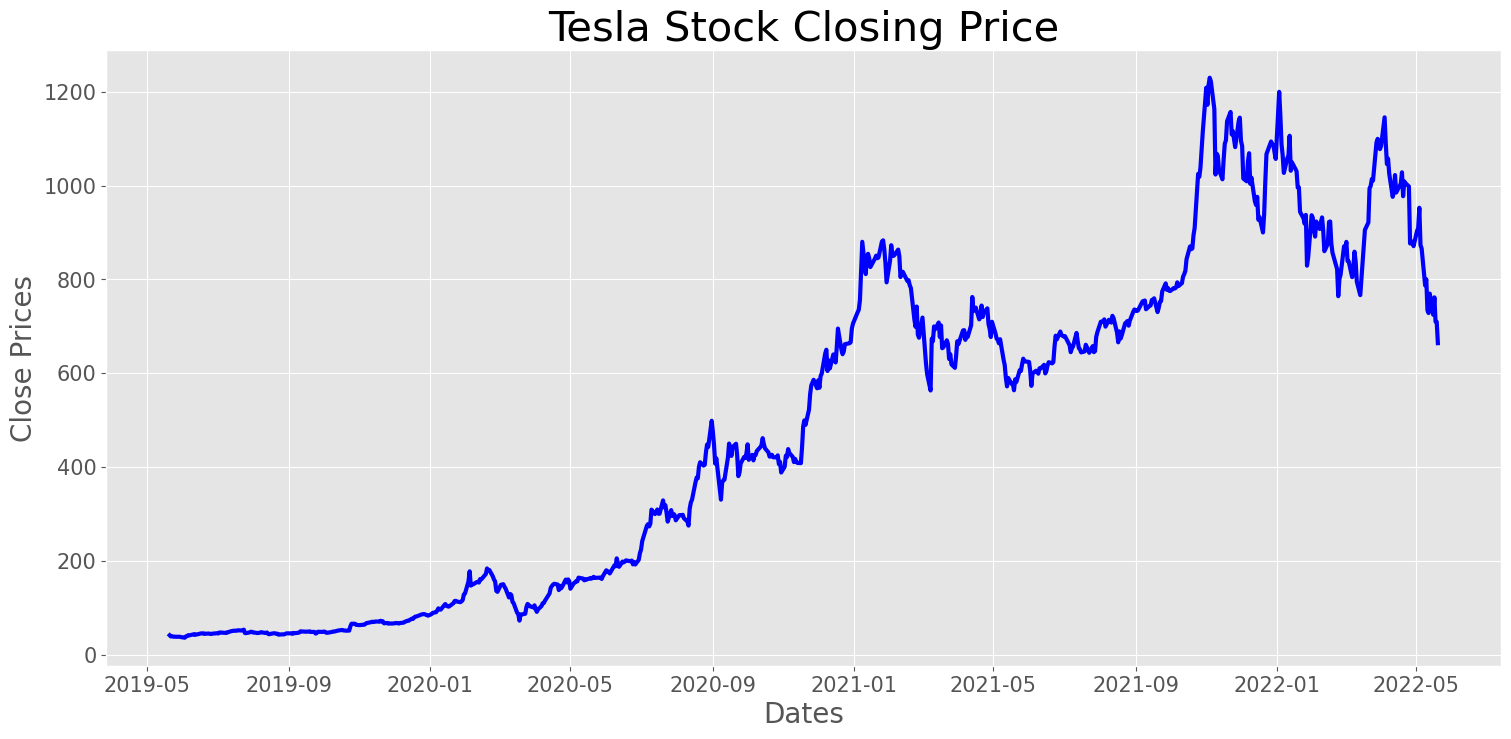

In [39]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) # True by default 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

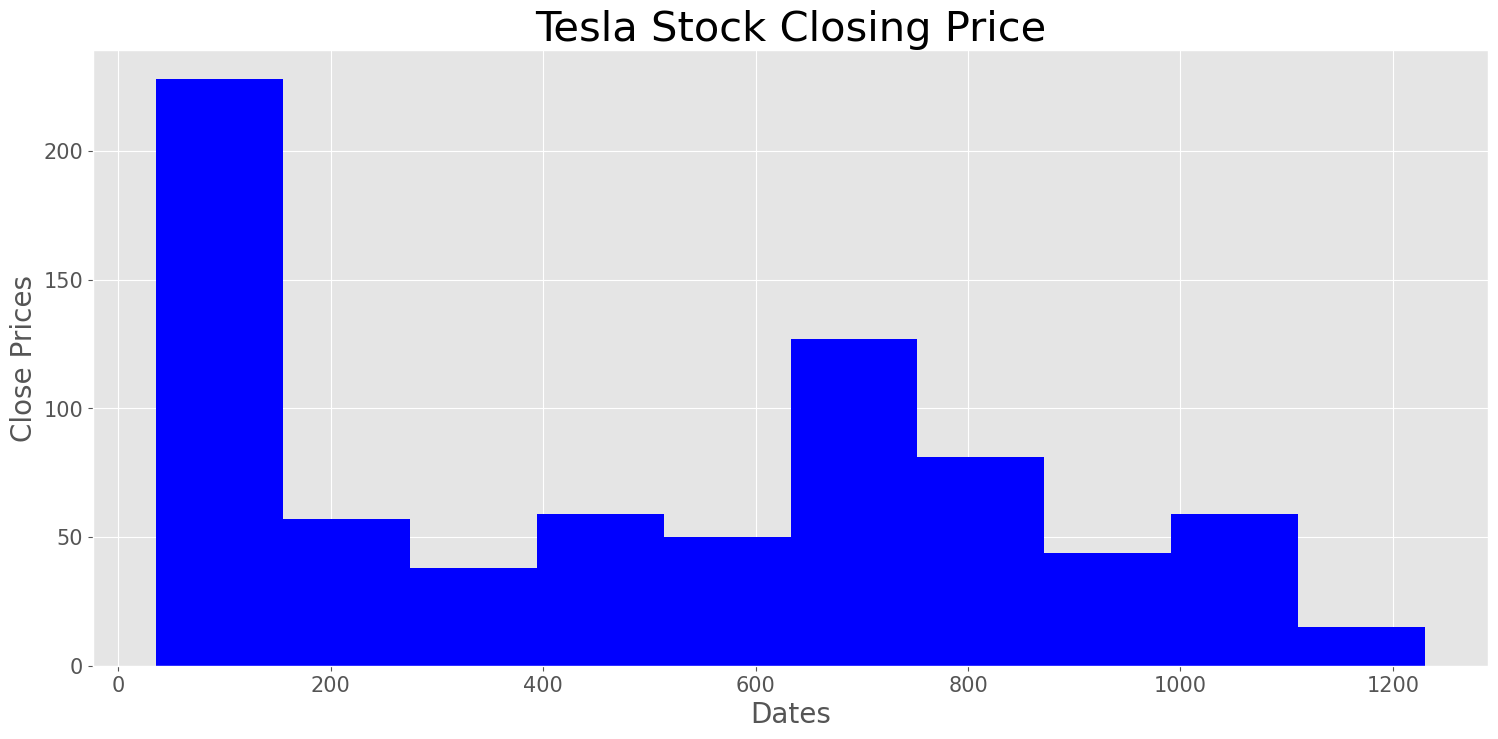

In [40]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

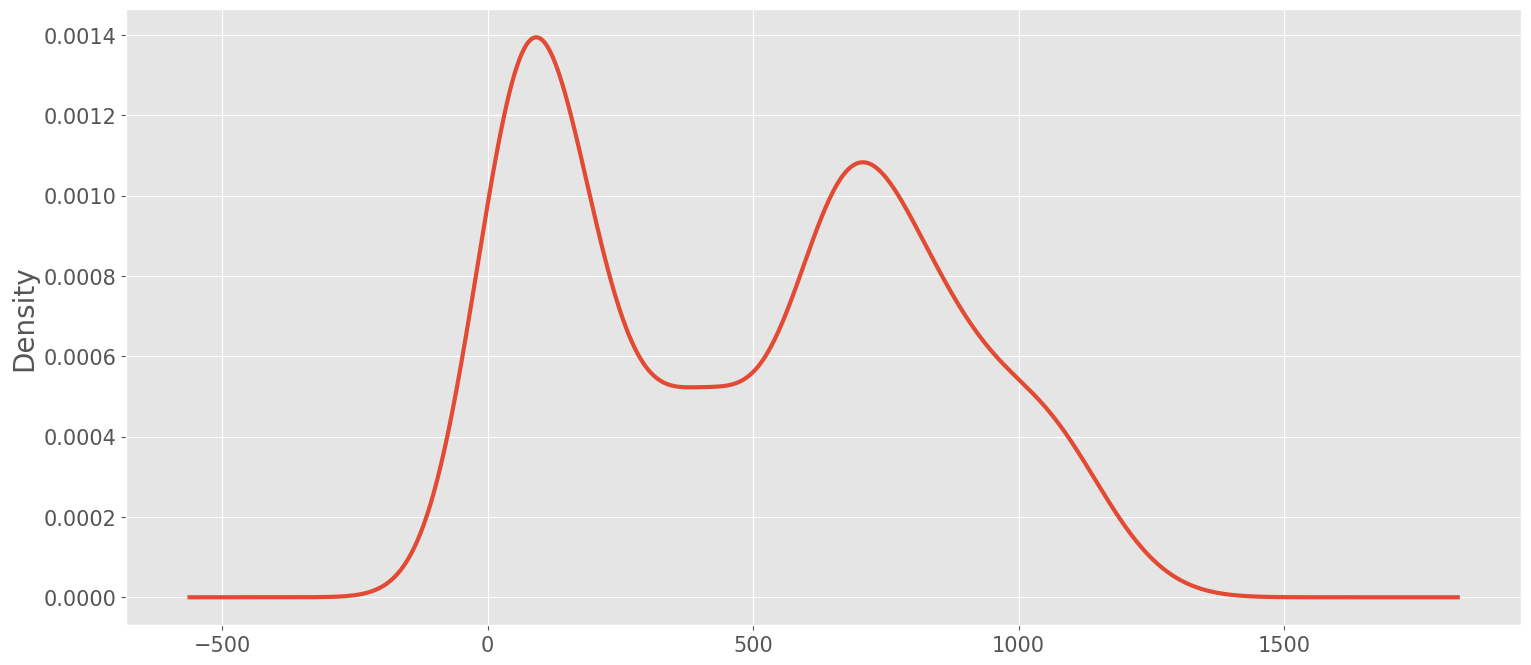

In [41]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [81]:
# Finding the Moving Avergae 
rolmean=stock_data.rolling(365).mean()

In [82]:
rolmean

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,NaN
2019-05-28,NaN
...,...
2022-05-16,812.017943
2022-05-17,812.478847
2022-05-18,812.782327


In [83]:
# Finding the Standard Deviation
rolstd=stock_data.rolling(365).std()

In [84]:
rolstd

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,NaN
2019-05-28,NaN
...,...
2022-05-16,164.116764
2022-05-17,163.736844
2022-05-18,163.442547


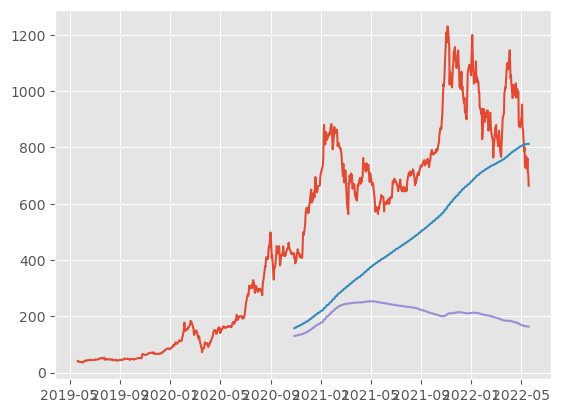

In [85]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [86]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [87]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

null hypothesis =data is non stationary

p value =0.599876
p<0.5
reject null hypothesis

p>0.5
accept the null hypothesis

In [102]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

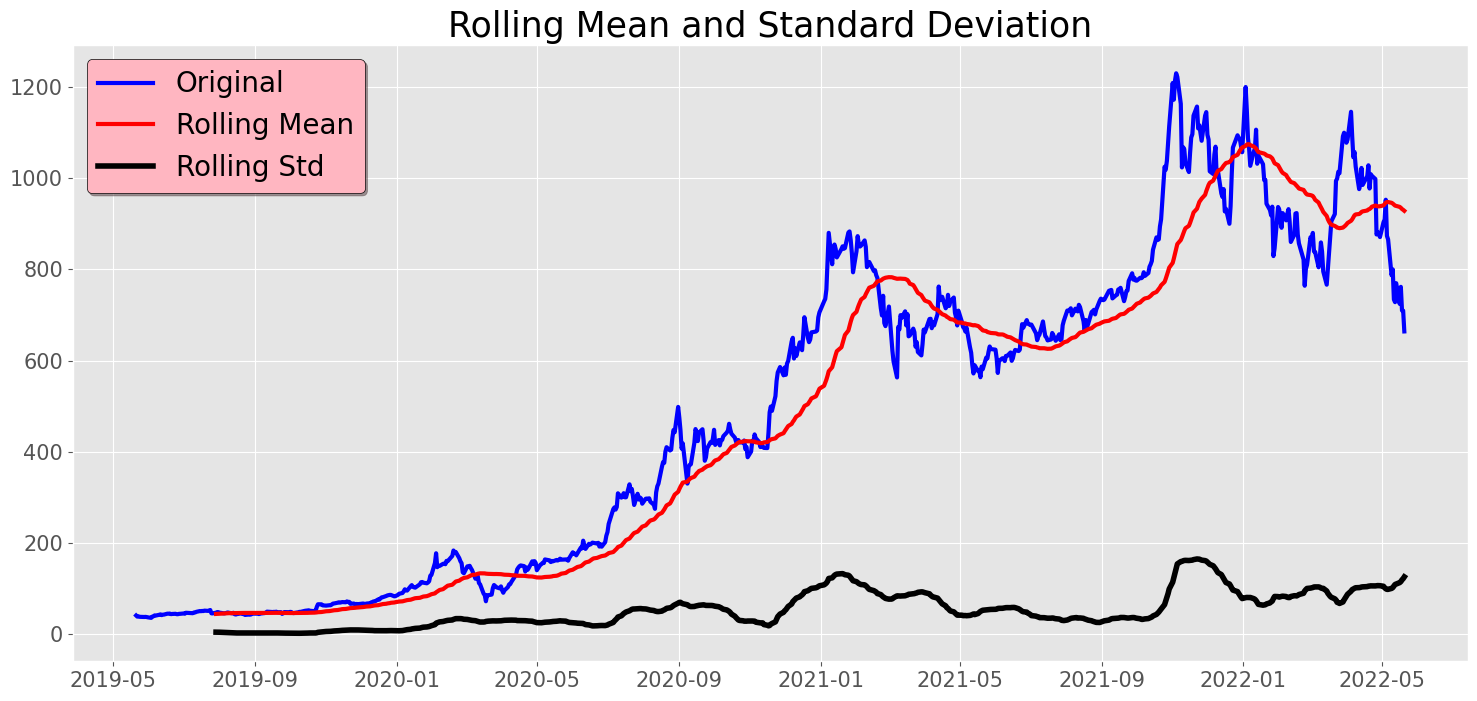

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [103]:
test_stationarity(stock_data.Close)

<AxesSubplot: >

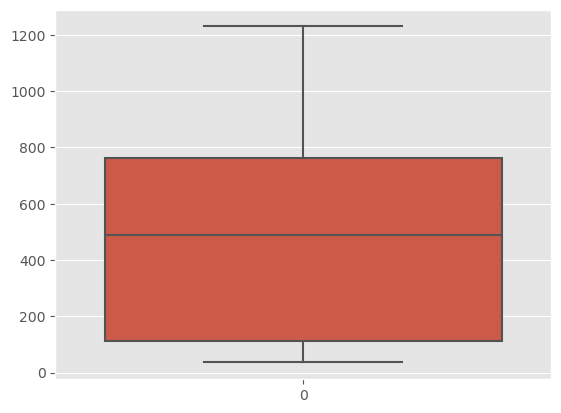

In [116]:
# Checking for the outliers 
import seaborn as sns
sns.boxplot(stock_data.Close) # No outlier here 

In [109]:
# Time Series Decomposition

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [113]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

In [ ]:
result.plot()

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [119]:
# Partial Autocorrelation and Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

### Preprocessing of the DATA 
1. Fill the missing Values
2. Convert the Data into Stationary Time Series
3. Normalize the Data if Required
4. Split into Train and Test 
5. Clean the Data by removing the Outlier

In [121]:
# Differencing the the method of converting the data from Non Stationary to Stationary 

In [123]:
df_close=stock_data['Close']

In [129]:
df_close=df_close.diff()
df_close=df_close.dropna()

In [ ]:
test_stationarity(df_close) # Will give the stationary data 
# Here the p-value will be greater thena 0.5 now we will be able to reject the null hypothesis

In [134]:
df_close[0:-60] # This dataset is for the trainning Purpose 

Date
2019-05-23     3.021996
2019-05-24    -1.523998
2019-05-28     0.586002
2019-05-29     0.617996
2019-05-30    -0.559998
                ...    
2022-02-17   -48.000061
2022-02-18    27.670044
2022-02-22   -16.079956
2022-02-23   -22.040100
2022-02-24    94.220093
Name: Close, Length: 696, dtype: float64

In [135]:
df_close[-60:] # For the Testing Purpose

Date
2022-02-25    -27.630066
2022-02-28     51.460022
2022-03-01    -66.619995
2022-03-02     21.580017
2022-03-03    -56.120056
2022-03-04     39.600037
2022-03-07    -32.709961
2022-03-08     53.529968
2022-03-09     14.749939
2022-03-10    -55.239929
2022-03-11    -22.280029
2022-03-14     13.970032
2022-03-15     64.500000
2022-03-16      2.819946
2022-03-17     -6.969971
2022-03-18      2.420044
2022-03-21    -18.020081
2022-03-22     57.050049
2022-03-23    -67.690002
2022-03-24      9.679993
2022-03-25    -18.089966
2022-03-28     84.479919
2022-03-29    -73.469971
2022-03-30    -13.309937
2022-03-31    -10.810059
2022-04-01     23.380005
2022-04-04     53.869995
2022-04-05   -115.049927
2022-04-06      8.689941
2022-04-07     57.000000
2022-04-08    -43.270020
2022-04-11    -17.789978
2022-04-12     60.580017
2022-04-13     24.399963
2022-04-14    -72.789978
2022-04-18     56.659973
2022-04-19      4.570068
2022-04-20    -74.810059
2022-04-21     82.530029
2022-04-22    -35.31

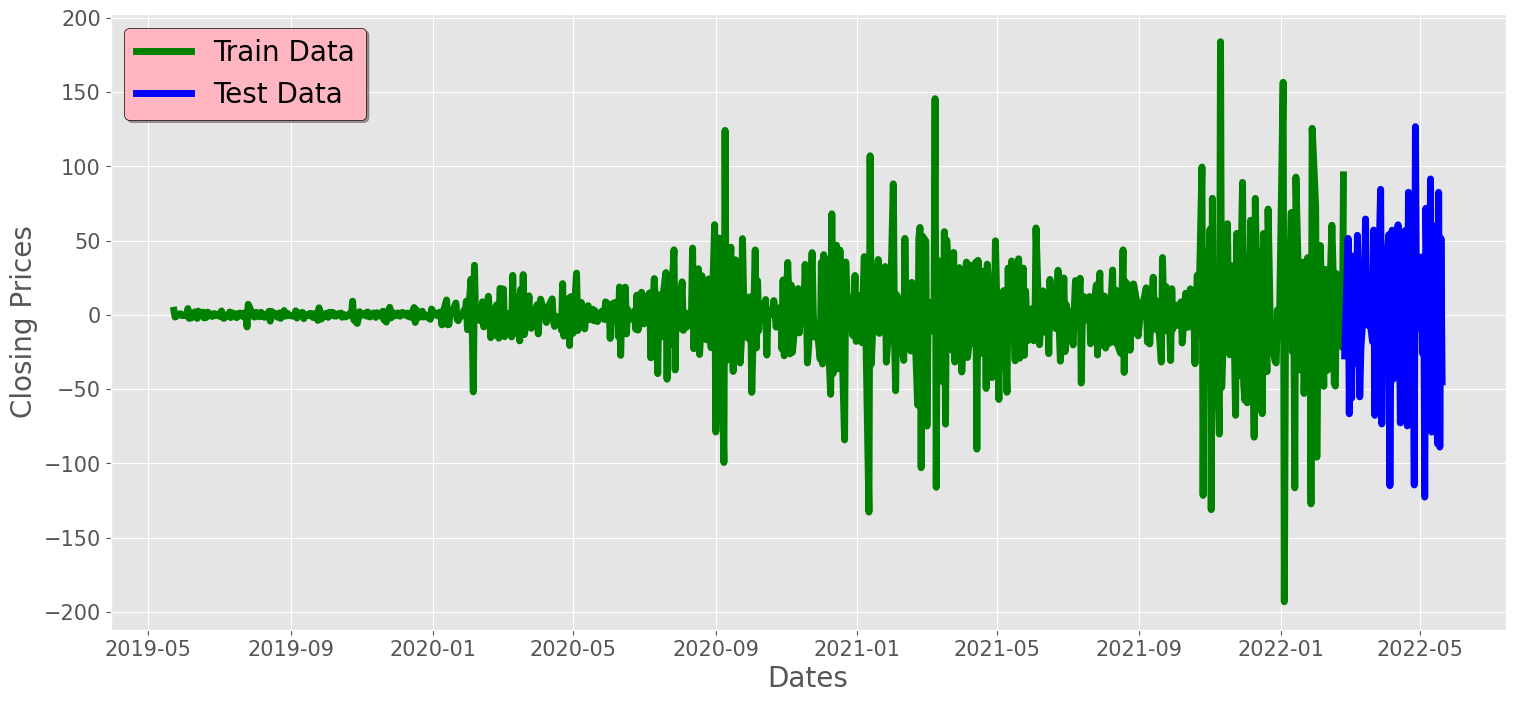

In [137]:
# Splitting the Data into Trainning and Test 
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data,'green',label='Train Data',linewidth=5)
plt.plot(test_data,'blue',label='Test Data',linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')

# Model Building

In [138]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [141]:
history=[x for x in train_data]

In [142]:
model=ARIMA(history,order=(1,1,1))

In [143]:
model=model.fit()

In [144]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  696
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3298.130
Date:                Sat, 03 Jun 2023   AIC                           6602.261
Time:                        05:19:53   BIC                           6615.893
Sample:                             0   HQIC                          6607.532
                                - 696                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4973      0.020    -24.983      0.000      -0.536      -0.458
ma.L1         -0.9999      1.196     -0.836      0.403      -3.345       1.345
sigma2       766.8062    917.305      0.836      0.403   -1031.078    2564.690
===================================================================================
Ljung-Box (L1) (Q):                  25.19   Jarque-Bera (JB):              1358.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              34.94   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
test_data[0]

-27.63006591796875

In [146]:
mean_squared_error([test_data[0]],model.forecast())

369.1812786898388

In [147]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

19.214090628750526

In [148]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [149]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

In [151]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 45.810411795582624


In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
fc_series = pd.Series(predictions, index=test_data.index)

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [ ]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')